In [316]:
import numpy as np
import pandas as pd
import random
import matplotlib
import seaborn as sns

In [317]:
class GridBoard:
    def __init__(self, cols, rows):
        self.rows = rows
        self.cols = cols
        self.rewards = pd.DataFrame(np.zeros((rows, cols)))
        self.walls = []
        #for w in self.walls:
        #   # check here to see if walls within the dataframe boundaries
        #    self.show_board[w[0]][w[1]] = "X"

        self.terminals = []  
        
        self.show_board = pd.DataFrame('.', index=range(self.rows), columns=range(self.cols))

    
    def assignRewards(self, row, col, reward):
        self.rewards[row][col] = reward
        self.terminals.append([row, col])
    
    def reset_showboard(self):
        self.show_board = pd.DataFrame('.', index=range(self.rows), columns=range(self.cols))
        #for w in self.walls:
        #    self.show_board[w[0]][w[1]] = "X"
    
    def set_walls(self, walls):
        for w in walls:
            self.walls.append(w)




In [318]:
class Player:
    def __init__(self, grid, start):
        self.start = start
        self.curr_state = self.start[:]
        grid.show_board[self.curr_state[0]][self.curr_state[1]] = "*"
        #self.state_count = pd.DataFrame(np.zeros((grid.rows, grid.cols)))
        #self.policy = pd.DataFrame(np.nan, index=range(0,grid.rows), columns=range(0,grid.cols))
        self.policy = pd.DataFrame(0, index=range(0,grid.rows), columns=range(0,grid.cols))
        self.v = pd.DataFrame(np.zeros((grid.rows, grid.cols)))

        # q_tables are a list within a dataframe cell with the directions [North, East, South, West], always start at 0
        self.qtable = pd.DataFrame([[[0, 0, 0, 0] for j in range(grid.cols)] for i in range(grid.rows)], index=range(grid.rows), columns=range(grid.cols))
    
    def move(self, direct):
        # determine if a move can occur
        # possible values for act: N, S, E, W
        # need next_state to find walls

        #next_state = self.detNextState(self.curr_state, direct)

        if direct == 'N':
            next_state = [self.curr_state[0], self.curr_state[1]-1]
            if self.curr_state[1] != 0 and next_state not in grid.walls: self.curr_state[1] -= 1 
            #if next_state not in grid.walls: self.curr_state[1] -= 1

        elif direct == 'E':
            next_state = [self.curr_state[0]+1, self.curr_state[1]]
            if next_state[0] < grid.cols and next_state not in grid.walls: self.curr_state[0] += 1 
            #if next_state not in grid.walls: self.curr_state[1] -= 1

        elif direct == 'S':
            next_state = [self.curr_state[0], self.curr_state[1]+1]
            if next_state[1] < grid.rows and next_state not in grid.walls: self.curr_state[1] += 1 
            #if next_state not in grid.walls: self.curr_state[1] += 1 

        elif direct == 'W':
            next_state = [self.curr_state[0]-1, self.curr_state[1]]
            if self.curr_state[0] != 0 and next_state not in grid.walls: self.curr_state[0] -= 1 
            #if next_state not in grid.walls: self.curr_state[0] -= 1 

        else:
            print("Invalid option")
        grid.reset_showboard()
        grid.show_board[self.curr_state[0]][self.curr_state[1]] = '*'
    
    def detNextState(self, curr_state, direct):

        if direct == 'N': next_state = [self.curr_state[0], self.curr_state[1]-1]
        elif direct == 'E': next_state = [self.curr_state[0]+1, self.curr_state[1]]
        elif direct == 'S': next_state = [self.curr_state[0], self.curr_state[1]+1]
        elif direct == 'W': next_state = [self.curr_state[0]-1, self.curr_state[1]]
        else: print("Invalid option")
        
        return next_state
    
    
    def findRandDirection(self):
        d = random.randint(1,4)
        if d == 1: return 'N'
        elif d == 2: return 'E'
        elif d == 3: return 'S'
        elif d == 4: return 'W'
        else:
            print("out of bounds")
        
    def detPolicyV(self):
        # determine policy & V table
        for i in range(0, len(player.policy.columns)):
            for j in range(0, len(player.policy.index)):
                dir = player.qtable[i][j].index(max(player.qtable[i][j]))         
                dirv = getDirChar(dir)
                player.policy[i][j] = dirv
                
                v = max(player.qtable[i][j])
                player.v[i][j] = v



            


In [319]:
class QLearn:
    def __init__(self, gamma, lr, deterministic):
        self.gamma = gamma
        self.deterministic = deterministic
        if not deterministic:
            self.lr = lr
        else:
            self.lr = 1
    
    def findQhat(self, rewards, qtable, cs, ns, d):
        qhat = 0
        if self.deterministic == True:
            if ns not in grid.walls:
                qhat = rewards[ns[0]][ns[1]] + self.gamma * max(qtable[ns[0]][ns[1]][0], qtable[ns[0]][ns[1]][1], qtable[ns[0]][ns[1]][2], qtable[ns[0]][ns[1]][3])
        else:
            if ns not in grid.walls:
                qhat = (1-self.lr) * qtable[cs[0]][cs[1]][d] + \
                    self.lr * (rewards[ns[0]][ns[1]] + self.gamma * \
                    max(qtable[ns[0]][ns[1]][0], qtable[ns[0]][ns[1]][1], qtable[ns[0]][ns[1]][2], qtable[ns[0]][ns[1]][3]))
                #print(qhat)

        return qhat

In [320]:
class Charts():
    def __init__(self, episodes):
        self.stepsGoal = pd.DataFrame(0, columns=['Steps'], index=range(1, episodes+1))
        self.stepsGoal.index.name = 'Episodes'
        #self.stepsGoal.insert(0, 'Episodes', self.stepsGoal.index)

In [321]:
# function to create gridboard, set up walls & boundaries and assign rewards
# recieves: columns, rows, arewards array for rewards
def setupGrid(columns, rows, arewards):
    grid = GridBoard(columns, rows)
    
    # create walls and boundaries, treat out of bounds as walls
    for c in range(0, grid.cols):
        grid.walls.append([c, -1])
        grid.walls.append([c, grid.rows])
    for r in range(0, grid.rows):
        grid.walls.append([-1, r])
        grid.walls.append([grid.cols, r])

    print(grid.walls)

    for reward in arewards:
        grid.assignRewards(reward[0], reward[1], reward[2])

    print(grid.terminals)

    return grid

In [322]:
def getDirInt(direct):
    d = 0
    if direct == 'N': d = 0
    elif direct == 'E': d = 1
    elif direct == 'S': d = 2
    elif direct == 'W': d = 3
    return d

def getDirChar(direct):
    d = ''
    if direct == 0: d = 'N'
    elif direct == 1: d = 'E'
    elif direct == 2: d = 'S'
    elif direct == 3: d = 'W'
    return d

In [323]:
# receives: pdef (if predefined path or not), iterations, path (none if not predefined)
def run(pdef, iters, path):

    #start = player.start
    eps = 0.1
    
    if pdef == False:
        for i in range(0, iters):
            stepCount = 0
            while player.curr_state not in grid.terminals:
                x = player.curr_state[0]
                y = player.curr_state[1]

                p = np.random.random()
                if p < (1-eps):
                    if player.policy[player.curr_state[0]][player.curr_state[1]] != 0:
                        direct = player.policy[player.curr_state[0]][player.curr_state[1]]
                    else: 
                        direct = player.findRandDirection()
                else: # random
                    direct = player.findRandDirection()

                next_state = player.detNextState(player.curr_state, direct)

                d = getDirInt(direct)

                qhat = qlearn.findQhat(grid.rewards, player.qtable, player.curr_state, next_state, d)
                qhat = round(qhat, 2)

                player.qtable[x][y][d] = qhat

                player.move(direct)

                stepCount += 1

                #print(player.curr_state)
                #print(grid.show_board)                

            player.detPolicyV()
            charts.stepsGoal['Steps'][i+1] = stepCount
            player.curr_state = player.start[:]
        player.qtable = player.qtable.round(2)

    
    else:   
        for t in path:            
            for direct in t:
                x = player.curr_state[0]
                y = player.curr_state[1]
                #direct = player.findRandDirection()

                next_state = player.detNextState(player.curr_state, direct)

                d = getDirInt(direct)

                qhat = qlearn.findQhat(grid.rewards, player.qtable, player.curr_state, next_state, d)

                qhat = round(qhat, 2)

                player.qtable[x][y][d] = qhat

                player.move(direct)

                #print(player.curr_state)
                #print(grid.show_board)
            player.curr_state = player.start[:]

        player.qtable = player.qtable.round(2)

In [324]:
aRewards = [[0, 2, 25], [1, 2, -100], [1, 0, -80], [2, 2, 80], [2, 0, 100]]

grid = setupGrid(3, 3, aRewards)
player = Player(grid, [0, 0])
qlearn = QLearn(0.5, 0.5, False)
iters = 10


print(player.curr_state)
print(grid.show_board)

path = [['S', 'E', 'S'], ['S', 'E', 'E', 'N'], ['S', 'E', 'E', 'S']]

run(True, iters, path)
print(player.qtable)
print(grid.show_board)







[[0, -1], [0, 3], [1, -1], [1, 3], [2, -1], [2, 3], [-1, 0], [3, 0], [-1, 1], [3, 1], [-1, 2], [3, 2]]
[[0, 2], [1, 2], [1, 0], [2, 2], [2, 0]]
[0, 0]
   0  1  2
0  *  .  .
1  .  .  .
2  .  .  .
                0                    1                   2
0  [0, 0, 0.0, 0]         [0, 0, 0, 0]        [0, 0, 0, 0]
1  [0, 0.0, 0, 0]  [0, 12.5, -50.0, 0]  [50.0, 0, 40.0, 0]
2    [0, 0, 0, 0]         [0, 0, 0, 0]        [0, 0, 0, 0]
   0  1  2
0  .  .  .
1  .  .  .
2  .  .  *


[[0, -1], [0, 2], [1, -1], [1, 2], [2, -1], [2, 2], [-1, 0], [3, 0], [-1, 1], [3, 1]]
[[2, 0]]
                    0                       1                 2
0  [0, 90.0, 72.9, 0]  [0, 100.0, 81.0, 81.0]      [0, 0, 0, 0]
1  [81.0, 81.0, 0, 0]      [90.0, 90.0, 0, 0]  [100.0, 0, 0, 0]
   0  1  2
0  .  .  *
1  .  .  .
   0  1  2
0  E  E  N
1  N  N  N
      0      1      2
0  90.0  100.0    0.0
1  81.0   90.0  100.0
          Steps
Episodes       
1             9
2            14
3            90
4             3
5             3
...         ...
96            3
97            3
98            3
99            3
100           3

[100 rows x 1 columns]


<AxesSubplot:xlabel='Episodes'>

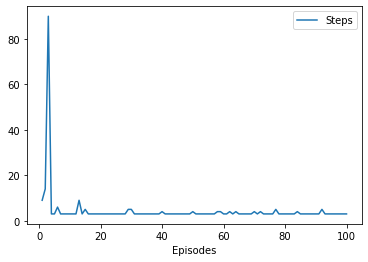

In [325]:
aRewards = [[2, 0, 100]]

iters = 100
grid = setupGrid(3, 2, aRewards)
player = Player(grid, [0, 1])
qlearn = QLearn(0.9, None, True)
charts = Charts(iters)

#print(player.curr_state)
#print(grid.show_board)

run(False, iters, None)
print(player.qtable)
print(grid.show_board)

player.detPolicyV()
print(player.policy)
print(player.v)


print(charts.stepsGoal)

sns.lineplot(data=charts.stepsGoal)

[[0, -1], [0, 5], [1, -1], [1, 5], [2, -1], [2, 5], [3, -1], [3, 5], [4, -1], [4, 5], [-1, 0], [5, 0], [-1, 1], [5, 1], [-1, 2], [5, 2], [-1, 3], [5, 3], [-1, 4], [5, 4]]
[[4, 4]]
                      0                         1                         2  \
0  [0, 47.83, 38.74, 0]  [0, 53.14, 43.05, 43.05]  [0, 59.05, 47.83, 47.83]   
1  [43.05, 0.0, 0.0, 0]    [47.83, 0.0, 0.0, 0.0]    [53.14, 0.0, 0.0, 0.0]   
2      [0.0, 0.0, 0, 0]          [0.0, 0.0, 0, 0]      [47.83, 0.0, 0.0, 0]   
3          [0, 0, 0, 0]              [0, 0, 0, 0]          [43.05, 0, 0, 0]   
4          [0, 0, 0, 0]              [0, 0, 0, 0]              [0, 0, 0, 0]   

                          3                        4  
0  [0, 65.61, 53.14, 53.14]      [0, 0, 72.9, 59.05]  
1  [59.05, 0.0, 0.0, 47.83]  [65.61, 0, 81.0, 53.14]  
2        [53.14, 0.0, 0, 0]   [72.9, 0, 90.0, 47.83]  
3      [47.83, 0.0, 0, 0.0]  [81.0, 0, 100.0, 43.05]  
4              [0, 0, 0, 0]             [0, 0, 0, 0]  
   0  1  2  3  

<AxesSubplot:xlabel='Episodes'>

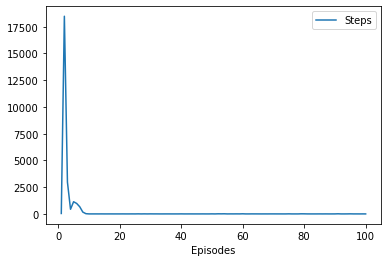

In [331]:
aRewards = [[4, 4, 100]]

iters = 100
grid = setupGrid(5, 5, aRewards)
player = Player(grid, [0, 0])
qlearn = QLearn(0.9, None, True)
charts = Charts(iters)

#print(player.curr_state)
#print(grid.show_board)

run(False, iters, None)
print(player.qtable)
print(grid.show_board)

player.detPolicyV()
print(player.policy)
print(player.v)


print(charts.stepsGoal)

sns.lineplot(data=charts.stepsGoal)

[[0, -1], [0, 2], [1, -1], [1, 2], [2, -1], [2, 2], [-1, 0], [3, 0], [-1, 1], [3, 1]]
[[2, 0]]
                     0                       1                2
0  [0, 90.0, 50.54, 0]  [0, 100.0, 0.0, 75.94]     [0, 0, 0, 0]
1  [81.0, 55.67, 0, 0]      [84.37, 0.0, 0, 0]  [50.0, 0, 0, 0]
   0  1  2
0  .  .  *
1  .  .  .
   0  1  2
0  E  E  N
1  N  N  N
      0       1     2
0  90.0  100.00   0.0
1  81.0   84.37  50.0
          Steps
Episodes       
1             6
2            37
3            67
4             3
5             3
...         ...
96            3
97            3
98            3
99            3
100           3

[100 rows x 1 columns]


<AxesSubplot:xlabel='Episodes'>

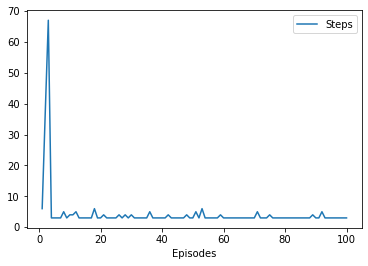

In [335]:
aRewards = [[2, 0, 100]]

iters = 100 
grid = setupGrid(3, 2, aRewards)
player = Player(grid, [0, 1])
# parameters: gamma, learning rate, deterministic?
qlearn = QLearn(0.9, 0.5, False)
charts = Charts(iters)

#print(player.curr_state)
#print(grid.show_board)

# parameters: predefined?, iterations, path (None if none)
run(False, iters, None)
print(player.qtable)
print(grid.show_board)

player.detPolicyV()
print(player.policy)
print(player.v)


print(charts.stepsGoal)

sns.lineplot(data=charts.stepsGoal)

In [326]:
print(player.policy[player.curr_state[0]][player.curr_state[1]])

N


In [327]:
import random
t = []
for i in range(1, 11):
    t.append([i, random.randint(1,11)])
print(t)

import random
m = []
for i in range(1, 11):
    m.append([i, random.randint(1,11)])
print(m)

combo = m + t
combo = [[2, 4], [3, 5], [3, 1], [6, 9], [10, 8]]
test = pd.DataFrame(combo, columns=['Steps1', 'Steps2'])
print(test)

[[1, 9], [2, 11], [3, 3], [4, 6], [5, 2], [6, 9], [7, 10], [8, 10], [9, 1], [10, 4]]
[[1, 5], [2, 11], [3, 9], [4, 10], [5, 7], [6, 11], [7, 7], [8, 6], [9, 9], [10, 6]]
   Steps1  Steps2
0       2       4
1       3       5
2       3       1
3       6       9
4      10       8


In [328]:
x = random.sample(range(10, 30), 10)

In [329]:
print(x)


[13, 23, 28, 12, 10, 22, 20, 15, 18, 11]


<AxesSubplot:>

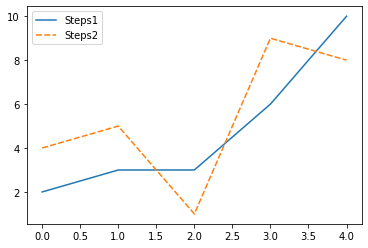

In [330]:
#newtest = test['Steps']
#newtest.index.name = 'Episodes'
#print(newtest)
sns.lineplot(data=test)